### LIBRARIES

In [20]:
import pandas as pd
import numpy as np
import json

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D
from matplotlib.colors import ListedColormap
from utilities.utils import load_sns_theme

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


### DATASET

In [3]:
df = pd.read_csv("data\superconductivity.csv")
df

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.00
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.00
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.00
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,22.00
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809,23.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21258,4,106.957877,53.095769,82.515384,43.135565,1.177145,1.254119,146.88130,15.504479,65.764081,...,3.555556,3.223710,3.519911,1.377820,0.913658,1,2.168889,0.433013,0.496904,2.44
21259,5,92.266740,49.021367,64.812662,32.867748,1.323287,1.571630,188.38390,7.353333,69.232655,...,2.047619,2.168944,2.038991,1.594167,1.337246,1,0.904762,0.400000,0.212959,122.10
21260,2,99.663190,95.609104,99.433882,95.464320,0.690847,0.530198,13.51362,53.041104,6.756810,...,4.800000,4.472136,4.781762,0.686962,0.450561,1,3.200000,0.500000,0.400000,1.98
21261,2,99.663190,97.095602,99.433882,96.901083,0.690847,0.640883,13.51362,31.115202,6.756810,...,4.690000,4.472136,4.665819,0.686962,0.577601,1,2.210000,0.500000,0.462493,1.84


### SEABORN THEME

In [16]:
load_sns_theme(r"utilities\themes\fire_theme.json")

{'figure.facecolor': '#202021',
 'axes.facecolor': '#262626',
 'axes.edgecolor': '#cfcfd1',
 'axes.grid': True,
 'grid.color': '#555555',
 'grid.linewidth': 0.5,
 'xtick.color': '#ffffff',
 'ytick.color': '#ffffff',
 'axes.labelcolor': '#ffffff'}

### MODELS

Standardize features

In [9]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

Model definition and fit

In [10]:
pca = PCA(n_components=5)

In [11]:
X_pca = pca.fit_transform(df_scaled)

All dimensions plot

<Axes: >

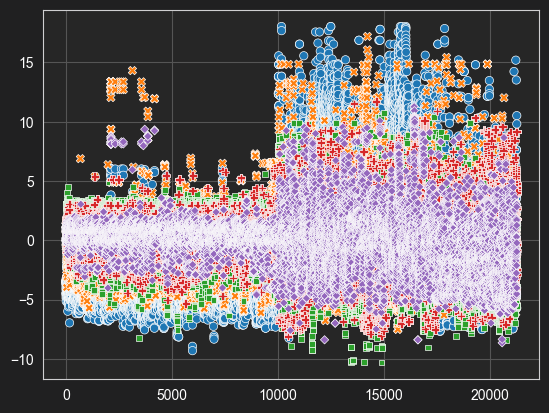

In [17]:
sns.scatterplot(
    data=X_pca, legend=False
)

First 3 dimensions plot

In [44]:
def get_features_name_from_dim(feature_names: list, pca_model, dimension: int):

    coefficients_dict = {feature_names[i]: pca_model.components_[dimension][i] for i in range(len(feature_names))}
    coefficients_dict = dict(sorted(coefficients_dict.items(), key=lambda x: abs(x[1]), reverse=True))

    print(f"\nCoefficients for Dimension {dimension}:")
    print(coefficients_dict)

    return coefficients_dict

In [45]:
feature_names = df.columns

coeff_0 = get_features_name_from_dim(feature_names=feature_names, pca_model=pca, dimension=0)

coeff_1 = get_features_name_from_dim(feature_names=feature_names, pca_model=pca, dimension=1)

coeff_2 = get_features_name_from_dim(feature_names=feature_names, pca_model=pca, dimension=2)


Coefficients for Dimension 0:
{'range_fie': -0.16278269975128798, 'range_atomic_radius': -0.1625313125561126, 'wtd_entropy_atomic_radius': -0.16230899266044596, 'wtd_std_fie': -0.16225561689631143, 'wtd_std_atomic_radius': -0.15936485443617038, 'entropy_Valence': -0.15770718742674522, 'wtd_entropy_atomic_mass': -0.1555796328493876, 'entropy_fie': -0.15549120718544474, 'wtd_entropy_Valence': -0.15497111081224954, 'number_of_elements': -0.15480509430951608, 'wtd_gmean_Density': 0.1543912131434352, 'std_fie': -0.1540907532268255, 'entropy_atomic_radius': -0.15230737234436795, 'gmean_Density': 0.14934174842597306, 'std_atomic_radius': -0.1486519018495139, 'wtd_gmean_Valence': 0.14596926784817743, 'entropy_atomic_mass': -0.14544717837303592, 'wtd_mean_Valence': 0.14403529863179895, 'range_ThermalConductivity': -0.1430128412747839, 'wtd_entropy_FusionHeat': -0.14224062138062643, 'gmean_Valence': 0.14034960233789828, 'mean_Valence': 0.13911262647961306, 'entropy_ElectronAffinity': -0.1387321

C:\Users\feder\AppData\Local\Temp\ipykernel_19148\665268704.py:4: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  c=df["critical_temp"].ravel(), cmap="rocket", s=2, alpha=0.6)


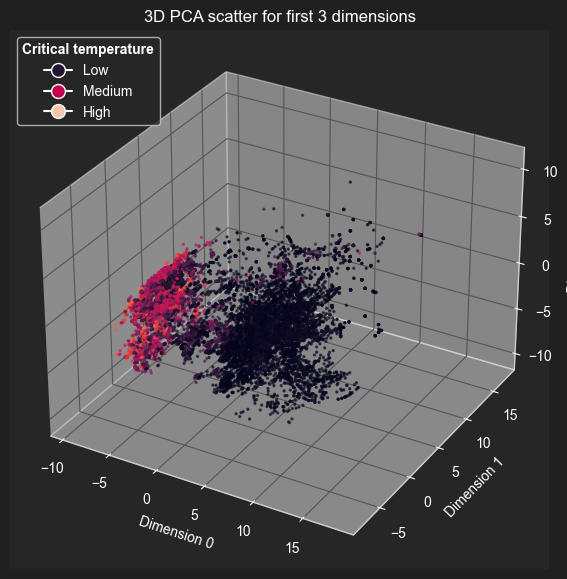

In [55]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs=X_pca[:, 0], ys=X_pca[:, 1], zs=X_pca[:, 2],
           c=df["critical_temp"].ravel(), cmap="rocket", s=2, alpha=0.6)

ax.set_xlabel('Dimension 0')
ax.set_ylabel('Dimension 1')
ax.set_zlabel('Dimension 2')
ax.set_title('3D PCA scatter for first 3 dimensions', color="white")

legend_elements = [
    Line2D([0], [0], marker='o', color='w', markerfacecolor="#251432", markersize=10, label='Low'),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='#c6004e', markersize=10, label='Medium'),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='#f5c5ac', markersize=10, label='High')
]

legend = ax.legend(handles=legend_elements, title="Critical temperature", loc='upper left', labels=['Low', 'Medium', 'High'])
for text in legend.get_texts():
    text.set_color('white')
legend.get_title().set_color('white')
legend.get_title().set_weight('bold')
